# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [21]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [22]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [23]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [24]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop("MEDV", axis=1)  
y = data["MEDV"]              

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (404, 13)
Testing set size: (102, 13)


Training Set: This means that the model will learn from 404 houses and each house has 13 characteristics (crime rate, room, tax etc)
Testing Set: These houses are ket asaide and will only be used to check if the model generalized well. The 13 is the same features as training. 


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)  
y_test_pred = lin_reg.predict(X_test)
print("First 5 predictions on test set:", y_test_pred[:5]) 

First 5 predictions on test set: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


## 3. Calculate and print R-squared for both the training and the testing set.

In [32]:
from sklearn.metrics import r2_score

# R² for training set
r2_train = r2_score(y_train, y_train_pred)

# R² for testing set
r2_test = r2_score(y_test, y_test_pred)

print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)

R-squared (Training): 0.7508856358979673
R-squared (Testing): 0.6687594935356307


## 4. Calculate and print mean squared error for both the training and the testing set.

In [33]:
from sklearn.metrics import mean_squared_error

# MSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)

# MSE for testing set
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)

Mean Squared Error (Training): 21.641412753226312
Mean Squared Error (Testing): 24.291119474973613


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [34]:
from sklearn.metrics import mean_absolute_error

# MAE for training set
mae_train = mean_absolute_error(y_train, y_train_pred)

# MAE for testing set
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mean Absolute Error (Training):", mae_train)
print("Mean Absolute Error (Testing):", mae_test)

Mean Absolute Error (Training): 3.314771626783227
Mean Absolute Error (Testing): 3.189091965887852


## Classification Model Evaluation

In [35]:
from sklearn.datasets import load_iris
data = load_iris()

In [36]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [37]:
column_names = data.feature_names

In [38]:
df = pd.DataFrame(data['data'],columns=column_names)

In [39]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
target = pd.DataFrame(data.target)

In [41]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [44]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [45]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Create DataFrame with features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column (flower class)
df["class"] = iris.target

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop("class", axis=1)   # features
y = df["class"]                # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)

# Train model
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("First 5 predictions on test set:", y_test_pred[:5])

First 5 predictions on test set: [1 0 2 1 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [48]:
from sklearn.metrics import accuracy_score

# Accuracy on training and test sets
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Accuracy (Training):", acc_train)
print("Accuracy (Testing):", acc_test)

Accuracy (Training): 0.975
Accuracy (Testing): 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [49]:
from sklearn.metrics import balanced_accuracy_score

# Balanced accuracy
bal_acc_train = balanced_accuracy_score(y_train, y_train_pred)
bal_acc_test = balanced_accuracy_score(y_test, y_test_pred)

print("Balanced Accuracy (Training):", bal_acc_train)
print("Balanced Accuracy (Testing):", bal_acc_test)

Balanced Accuracy (Training): 0.975609756097561
Balanced Accuracy (Testing): 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [50]:
from sklearn.metrics import precision_score

prec_train = precision_score(y_train, y_train_pred, average='macro')
prec_test = precision_score(y_test, y_test_pred, average='macro')

print("Precision (Training):", prec_train)
print("Precision (Testing):", prec_test)

Precision (Training): 0.9761904761904763
Precision (Testing): 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [51]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, y_train_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')

print("Recall (Training):", recall_train)
print("Recall (Testing):", recall_test)

Recall (Training): 0.975609756097561
Recall (Testing): 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [52]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("F1 Score (Training):", f1_train)
print("F1 Score (Testing):", f1_test)

F1 Score (Training): 0.974996093139553
F1 Score (Testing): 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [53]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training):\n", cm_train)
print("\nConfusion Matrix (Testing):\n", cm_test)

Confusion Matrix (Training):
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]

Confusion Matrix (Testing):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


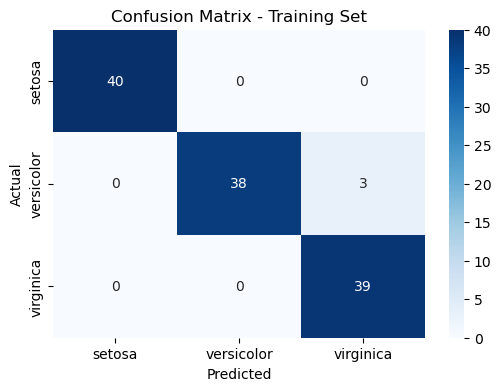

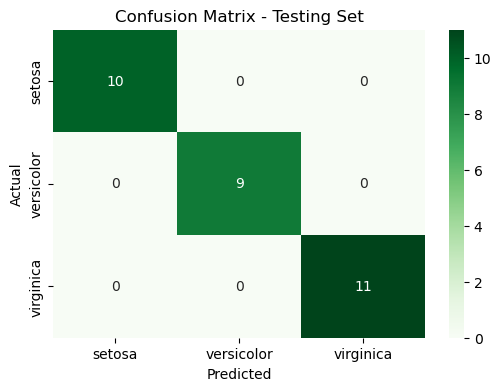

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Training confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Testing confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

We can say that Setosa flower was prefectly classified. And that 3 missclassified as Virginica. 

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [ ]:
# Have fun here !